In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 200
sns.set_theme(style = 'darkgrid')
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [35]:
xls = pd.ExcelFile(r"F:\Krishna\Excel R\Data Scientist\Assignments\Decision Tree\heart_disease.xlsx")
df1 = pd.read_excel(xls, 'Description')
df = pd.read_excel(xls, 'Heart_disease')

In [36]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

We have null values in oldpeak feature, let's impute them.

In [10]:
from sklearn.impute import SimpleImputer

In [37]:
si = SimpleImputer(strategy = 'median')

In [38]:
df[['oldpeak']] = si.fit_transform(df[['oldpeak']])

In [39]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

removed null values

In [40]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,fixed defect,4


In exang column, the datatype should be Boolean but its object bcz there are spelling mistakes, let's edit it.

In [41]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [43]:
df['exang'].replace(['FALSE', 'TURE'], ['False', 'True'], inplace = True)

In [44]:
df['exang'].unique()

array([False, True, 'False', 'True'], dtype=object)

In [45]:
df['exang'].replace(['False', 'True'], [False, True], inplace = True)

In [46]:
df['exang'].unique()

array([False,  True])

In [47]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect,4


In [48]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

Have corrected all the datatypes

In [49]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [50]:
df.duplicated().sum()

1

Let's drop Duplicates

In [51]:
df.shape

(908, 13)

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df.shape

(907, 13)

In [54]:
df.duplicated().sum()

0

Removed Duplicated entry

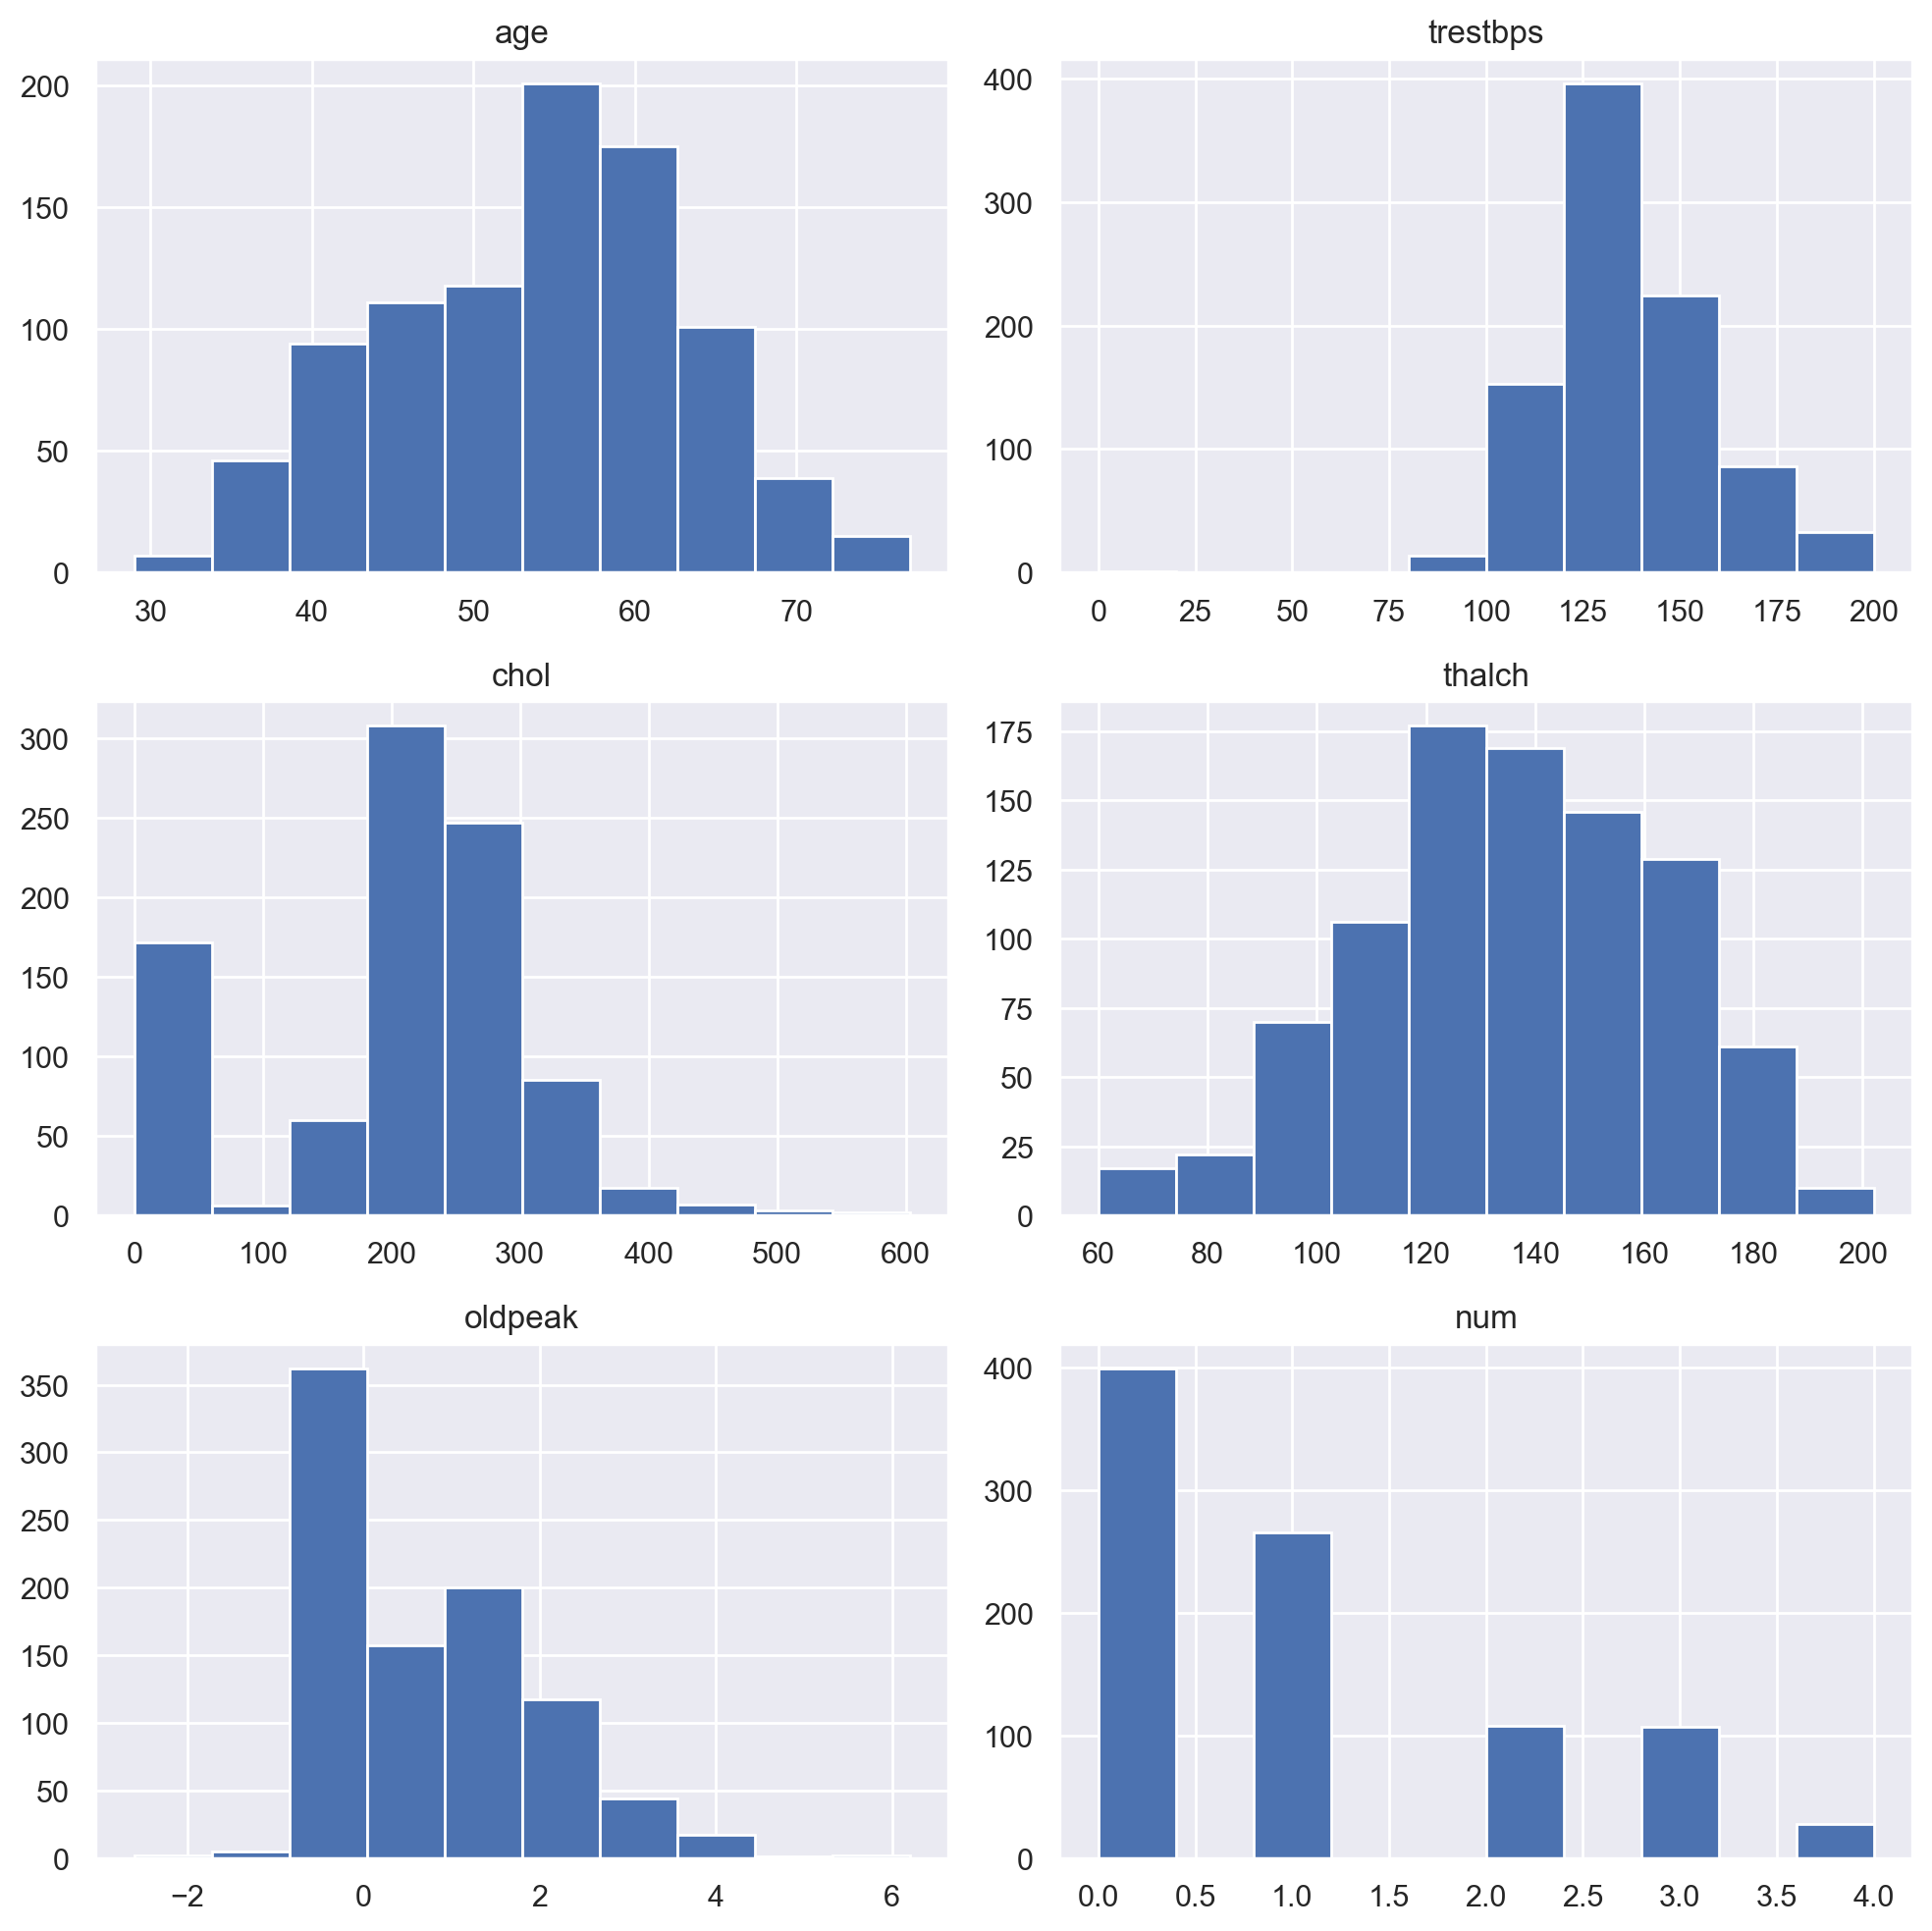

In [55]:
df.hist()
plt.tight_layout()

<Axes: >

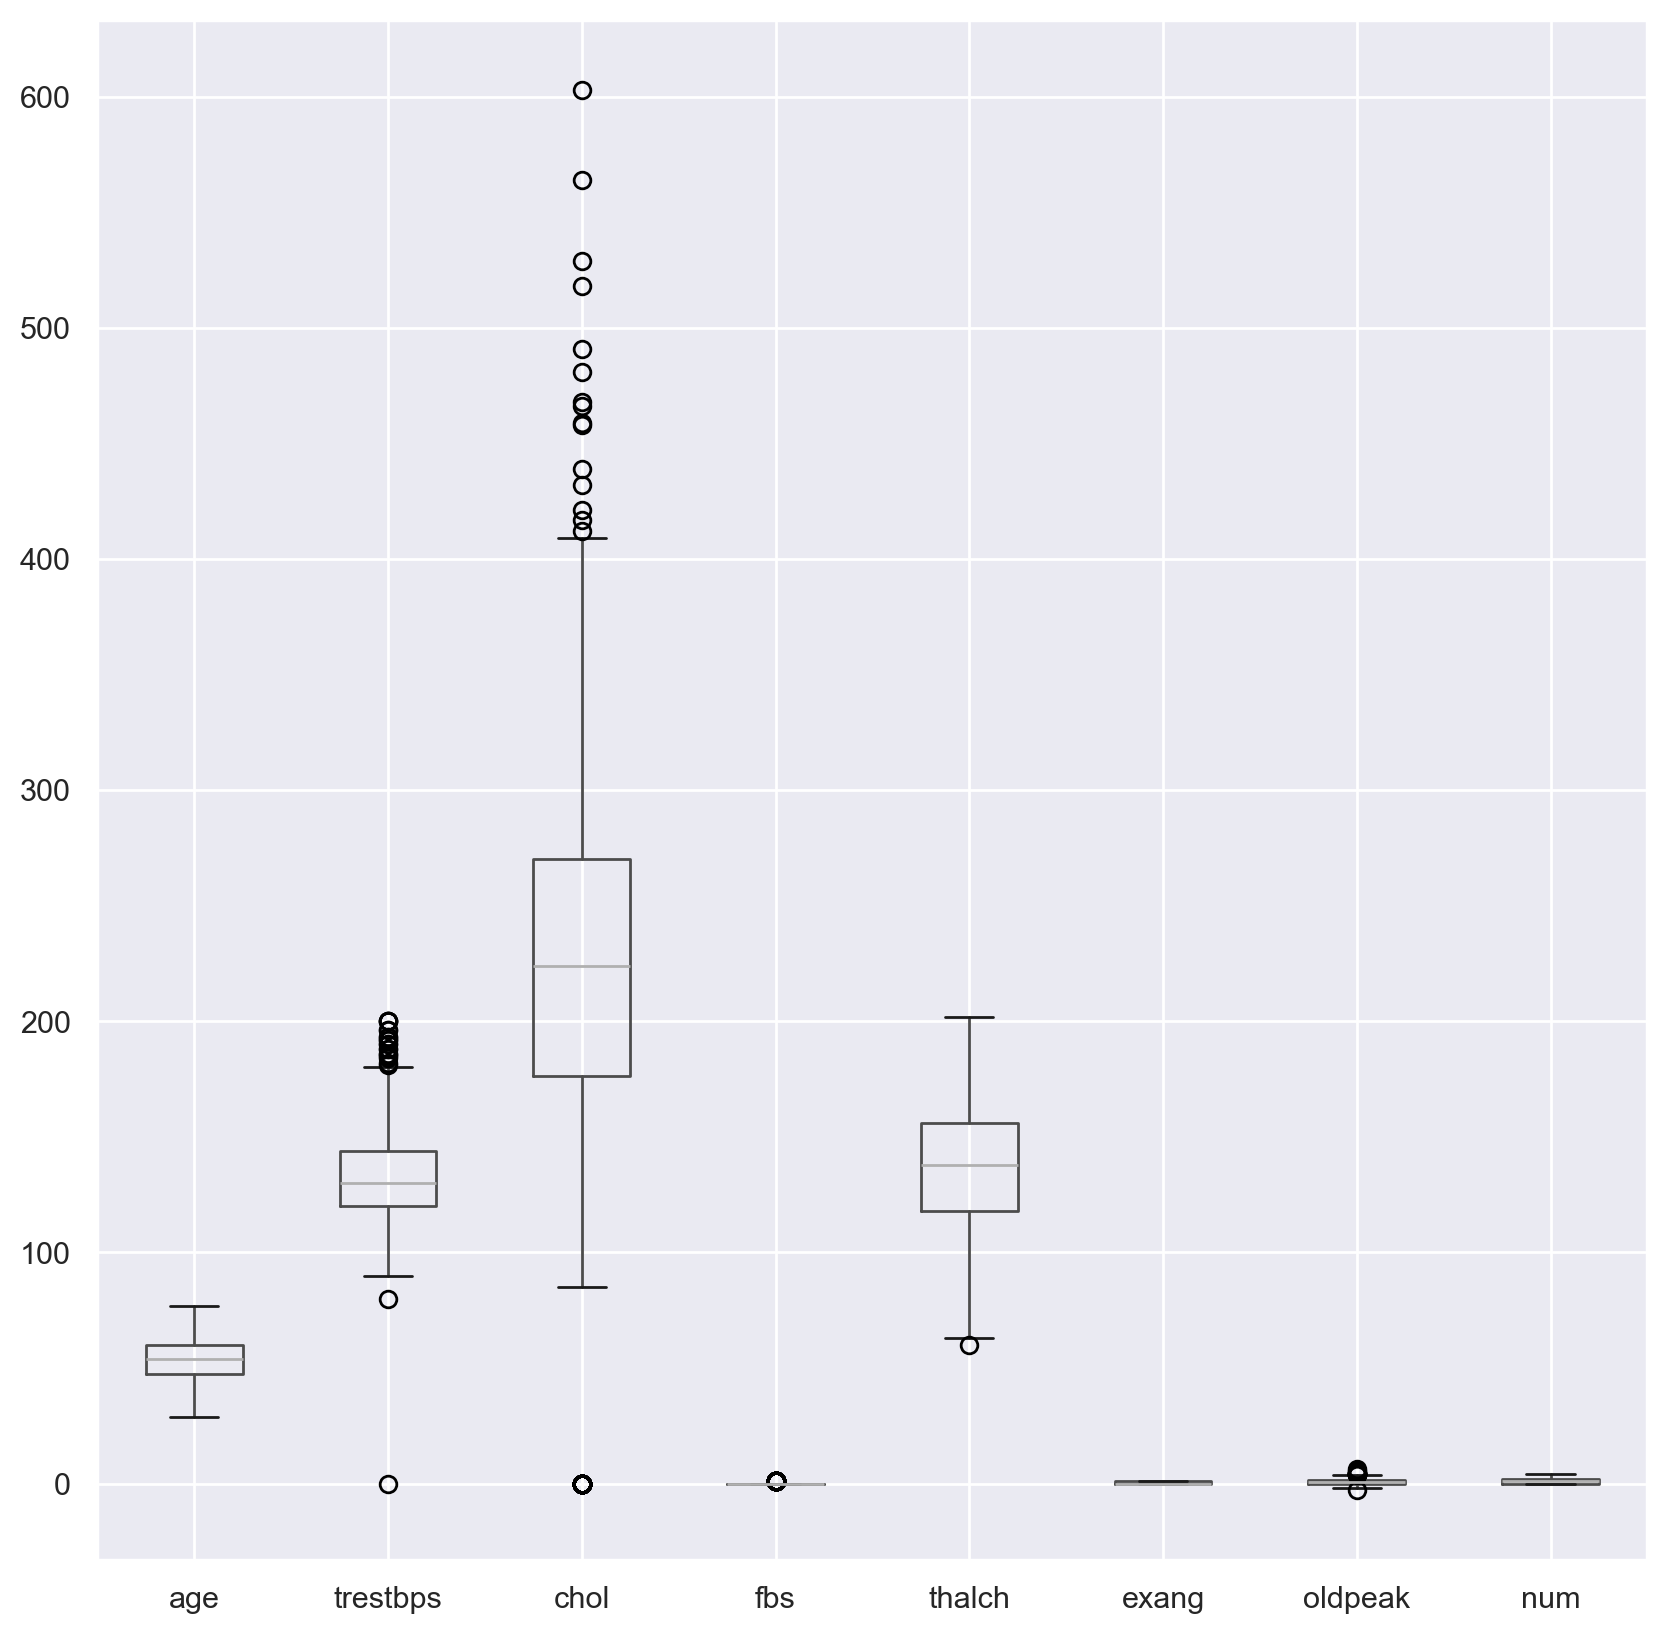

In [56]:
df.boxplot()

In [57]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [60]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41.0,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57.0,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52.0,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57.0,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62.0,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56.0,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56.0,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect,4


In [70]:
outlier_detection(df, df.iloc[:,[0,3,4,7,9,12]].columns)

<Axes: >

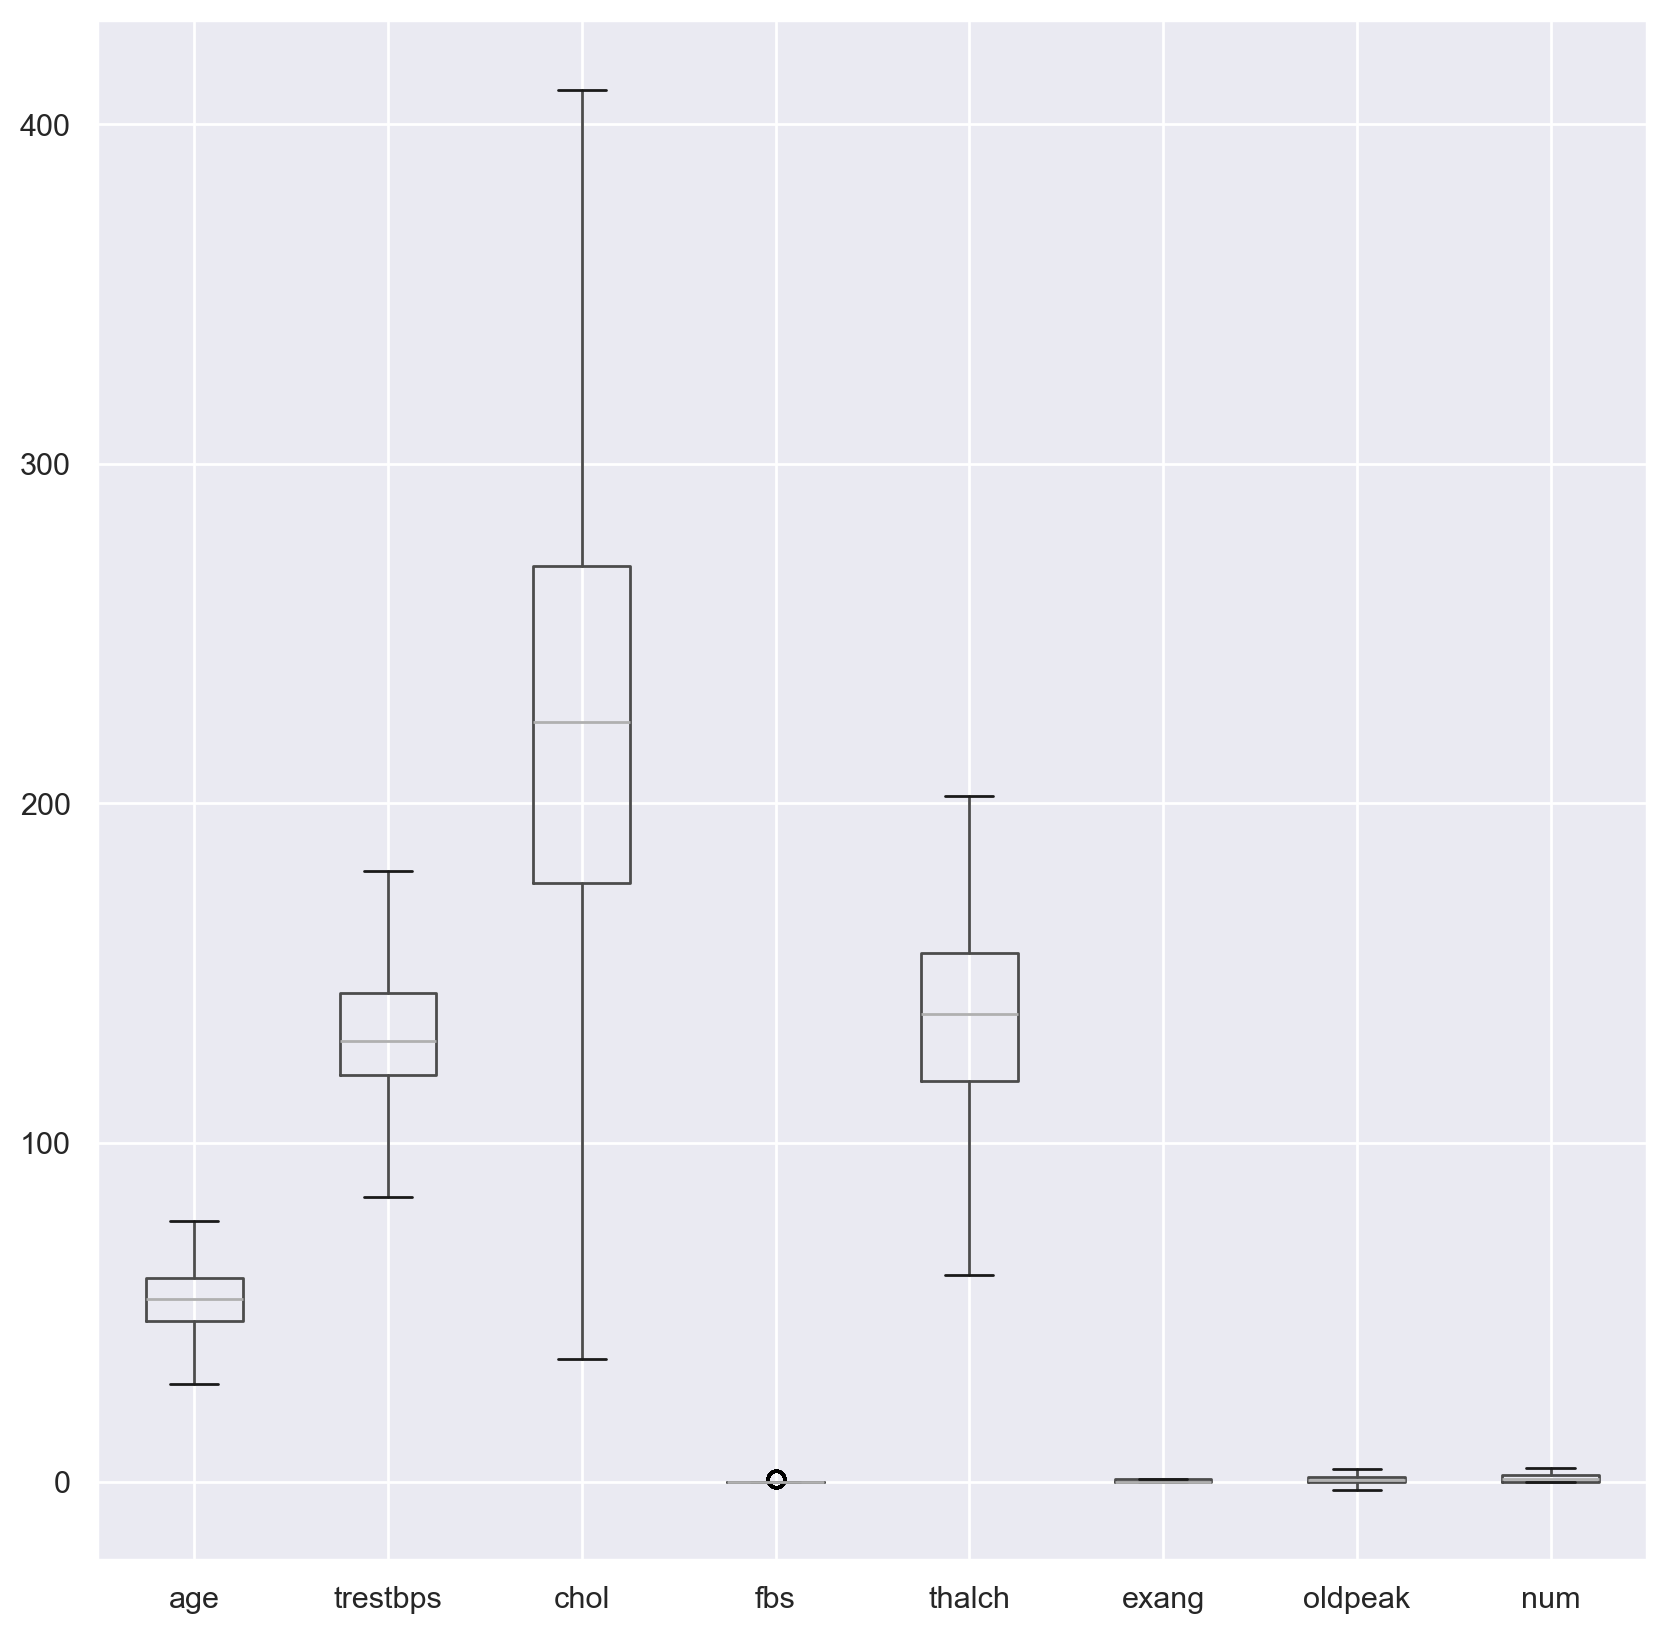

In [71]:
df.boxplot()

Scatter plot and Correlation

<Axes: xlabel='age', ylabel='chol'>

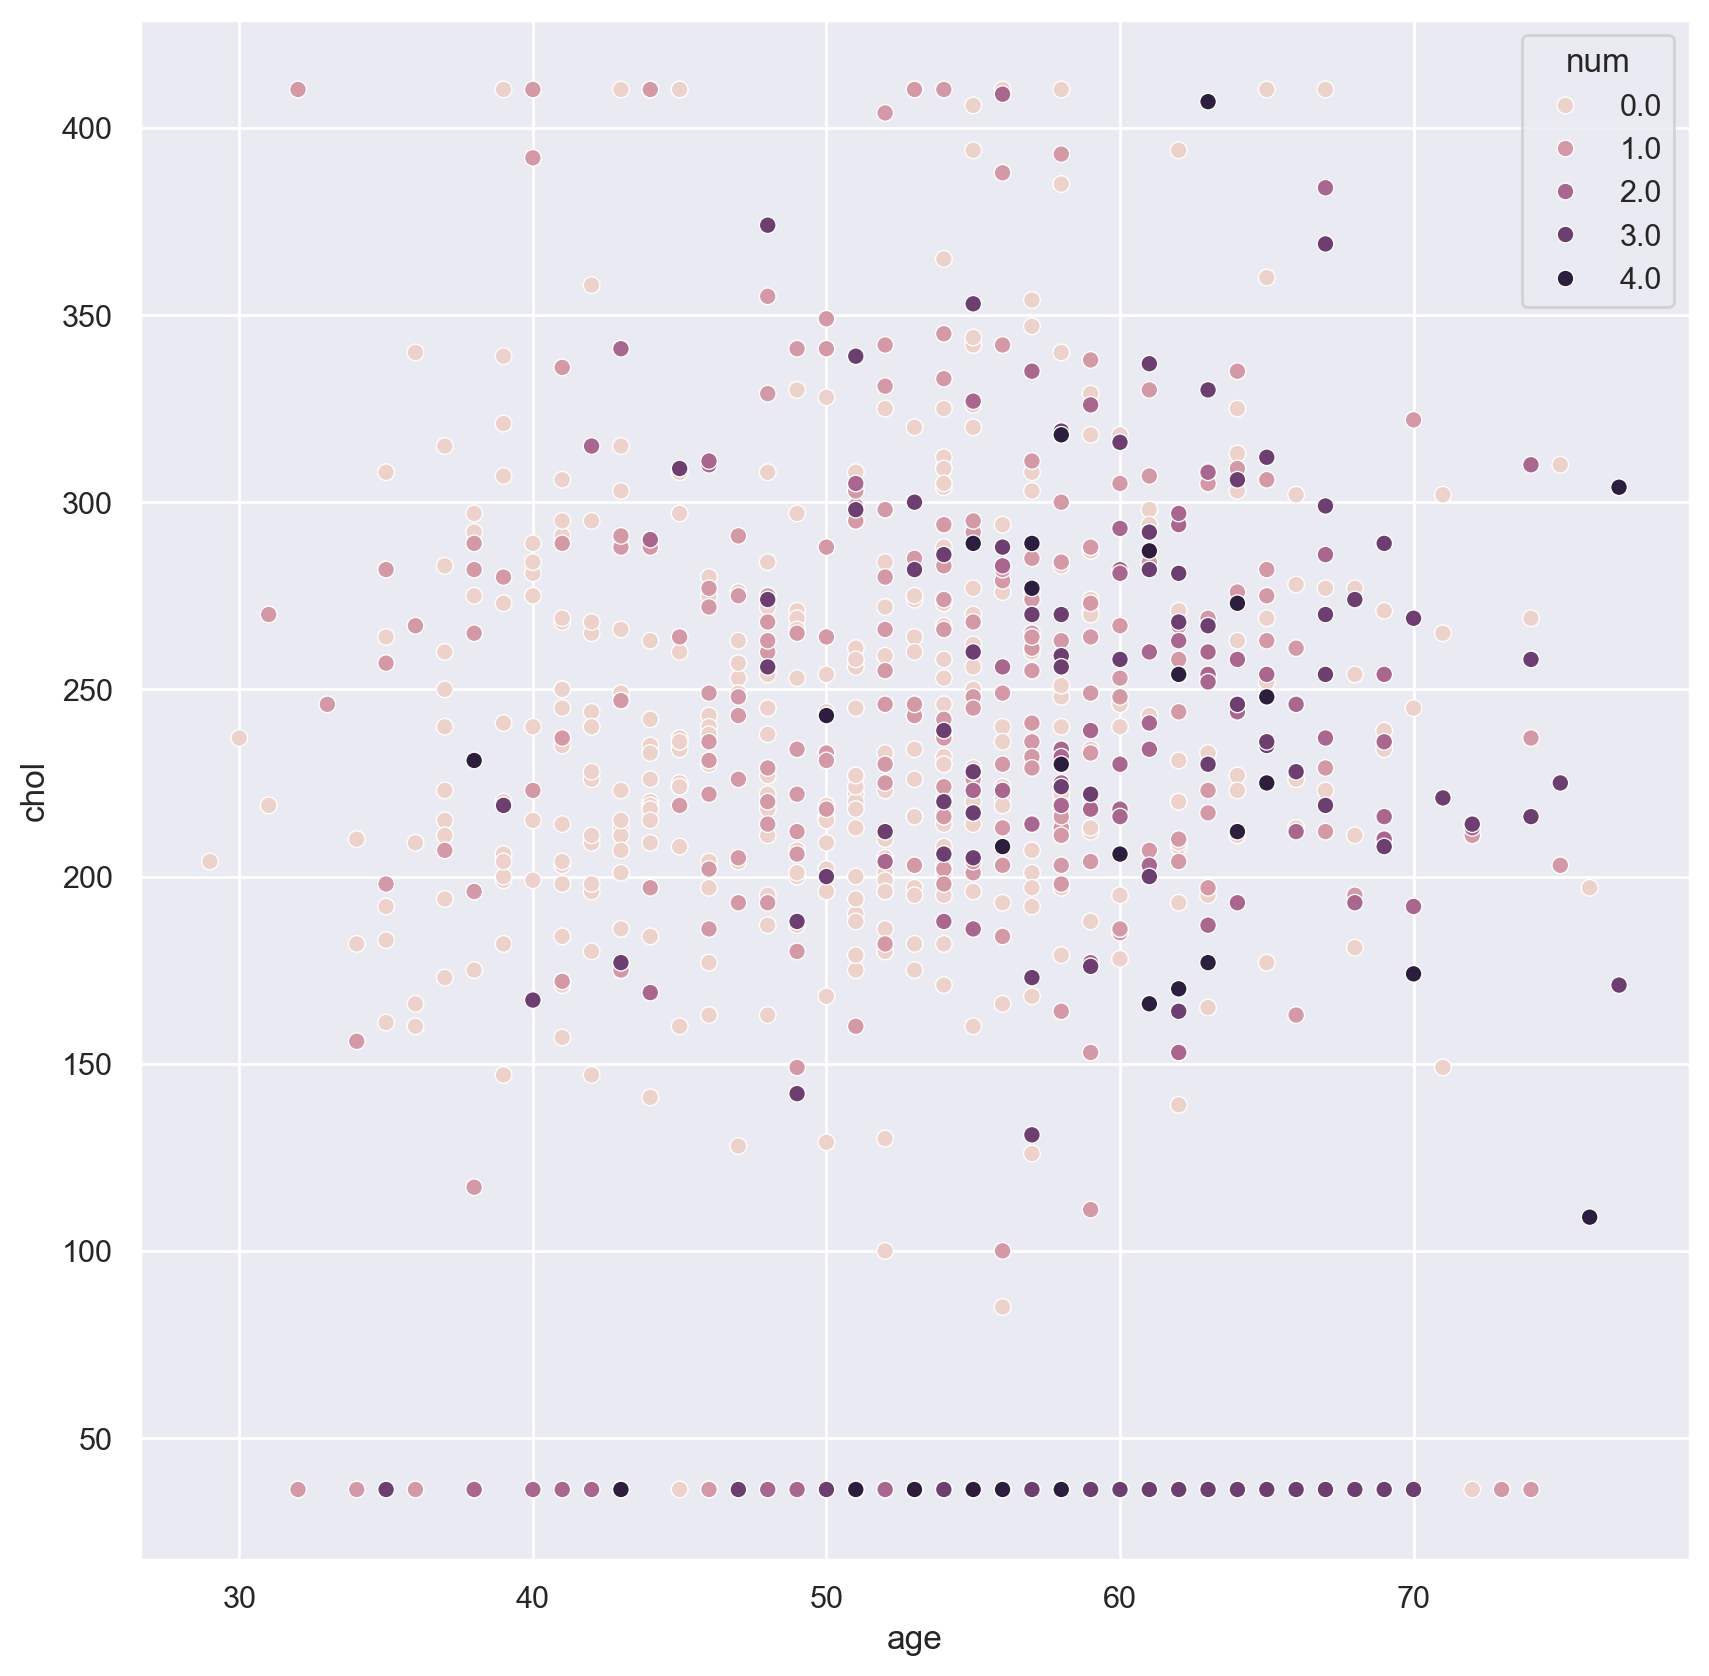

In [72]:
sns.scatterplot(x = df['age'],y = df['chol'], hue = df['num'])

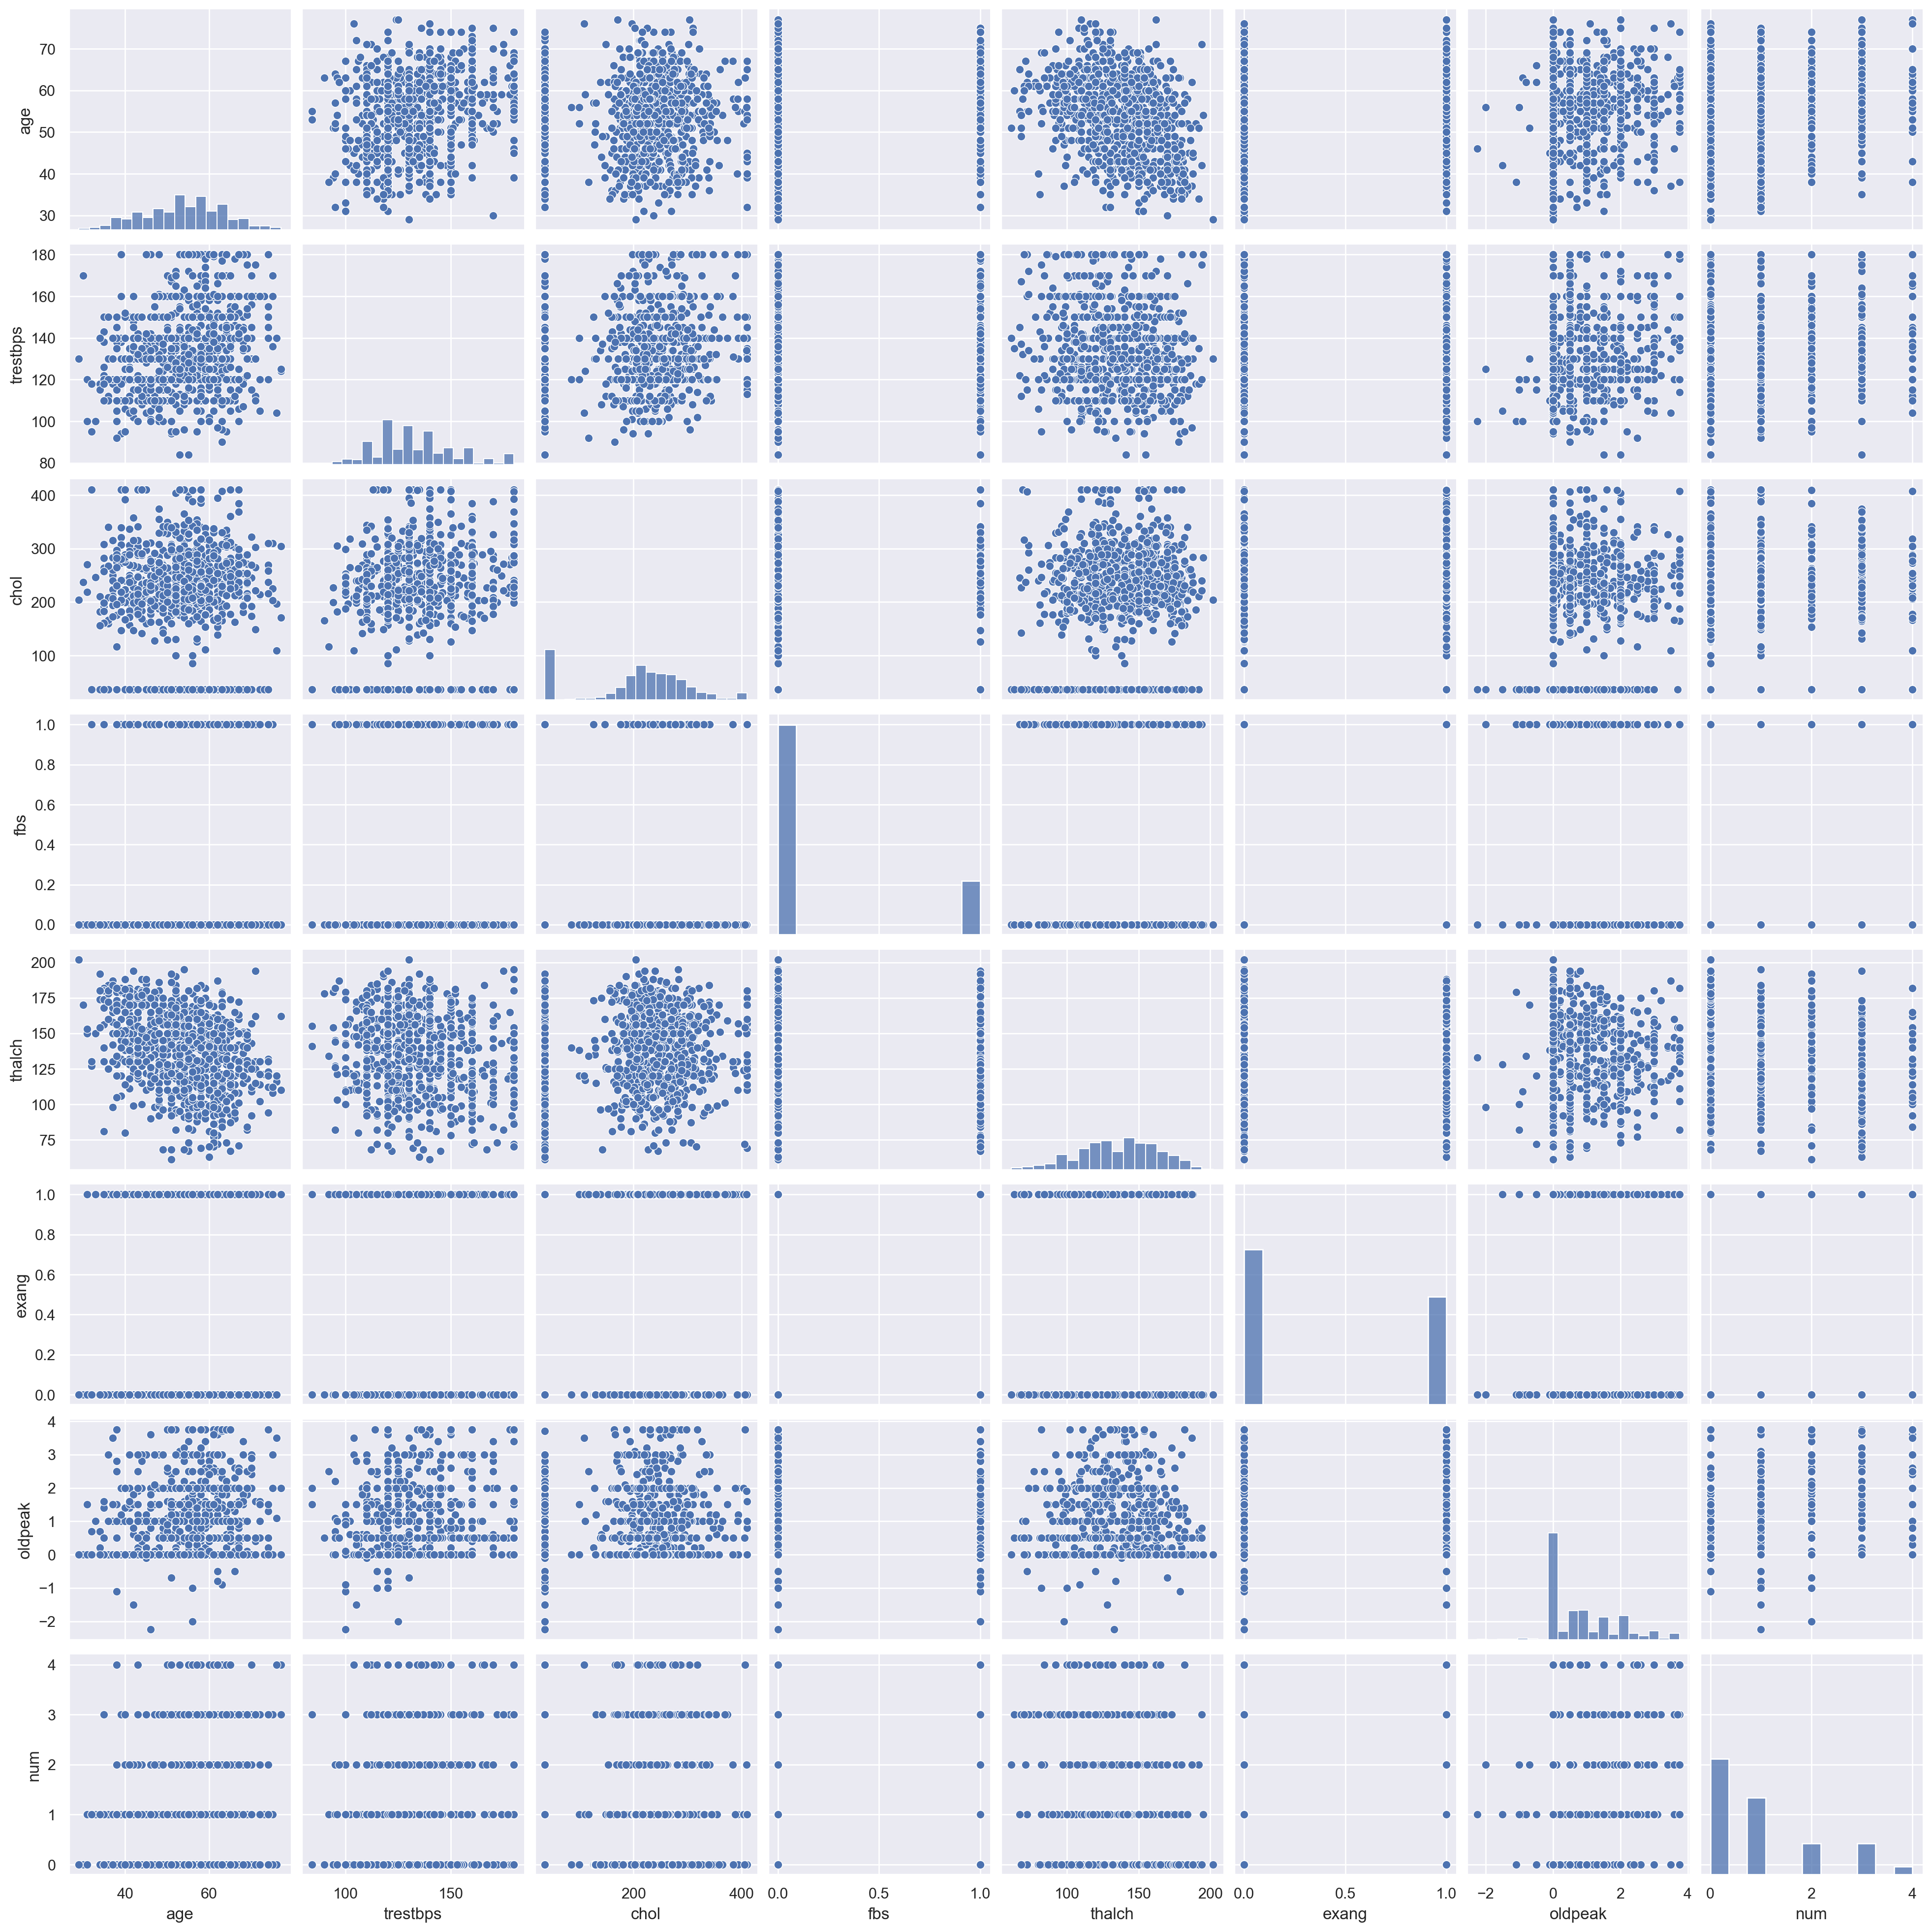

In [73]:
sns.pairplot(df)

In [74]:
df.corr()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.261741,-0.092618,0.177004,-0.327919,0.192202,0.221335,0.326227
trestbps,0.261741,1.000000,0.126318,0.113043,-0.131224,0.150065,0.142701,0.141934
chol,-0.092618,0.126318,1.000000,-0.112193,0.194884,-0.027979,0.033985,-0.228771
fbs,0.177004,0.113043,-0.112193,1.000000,-0.065856,0.028502,0.011430,0.156839
thalch,-0.327919,-0.131224,0.194884,-0.065856,1.000000,-0.348743,-0.115995,-0.322633
exang,0.192202,0.150065,-0.027979,0.028502,-0.348743,1.000000,0.366095,0.358837
oldpeak,0.221335,0.142701,0.033985,0.011430,-0.115995,0.366095,1.000000,0.407176
num,0.326227,0.141934,-0.228771,0.156839,-0.322633,0.358837,0.407176,1.000000


<Axes: >

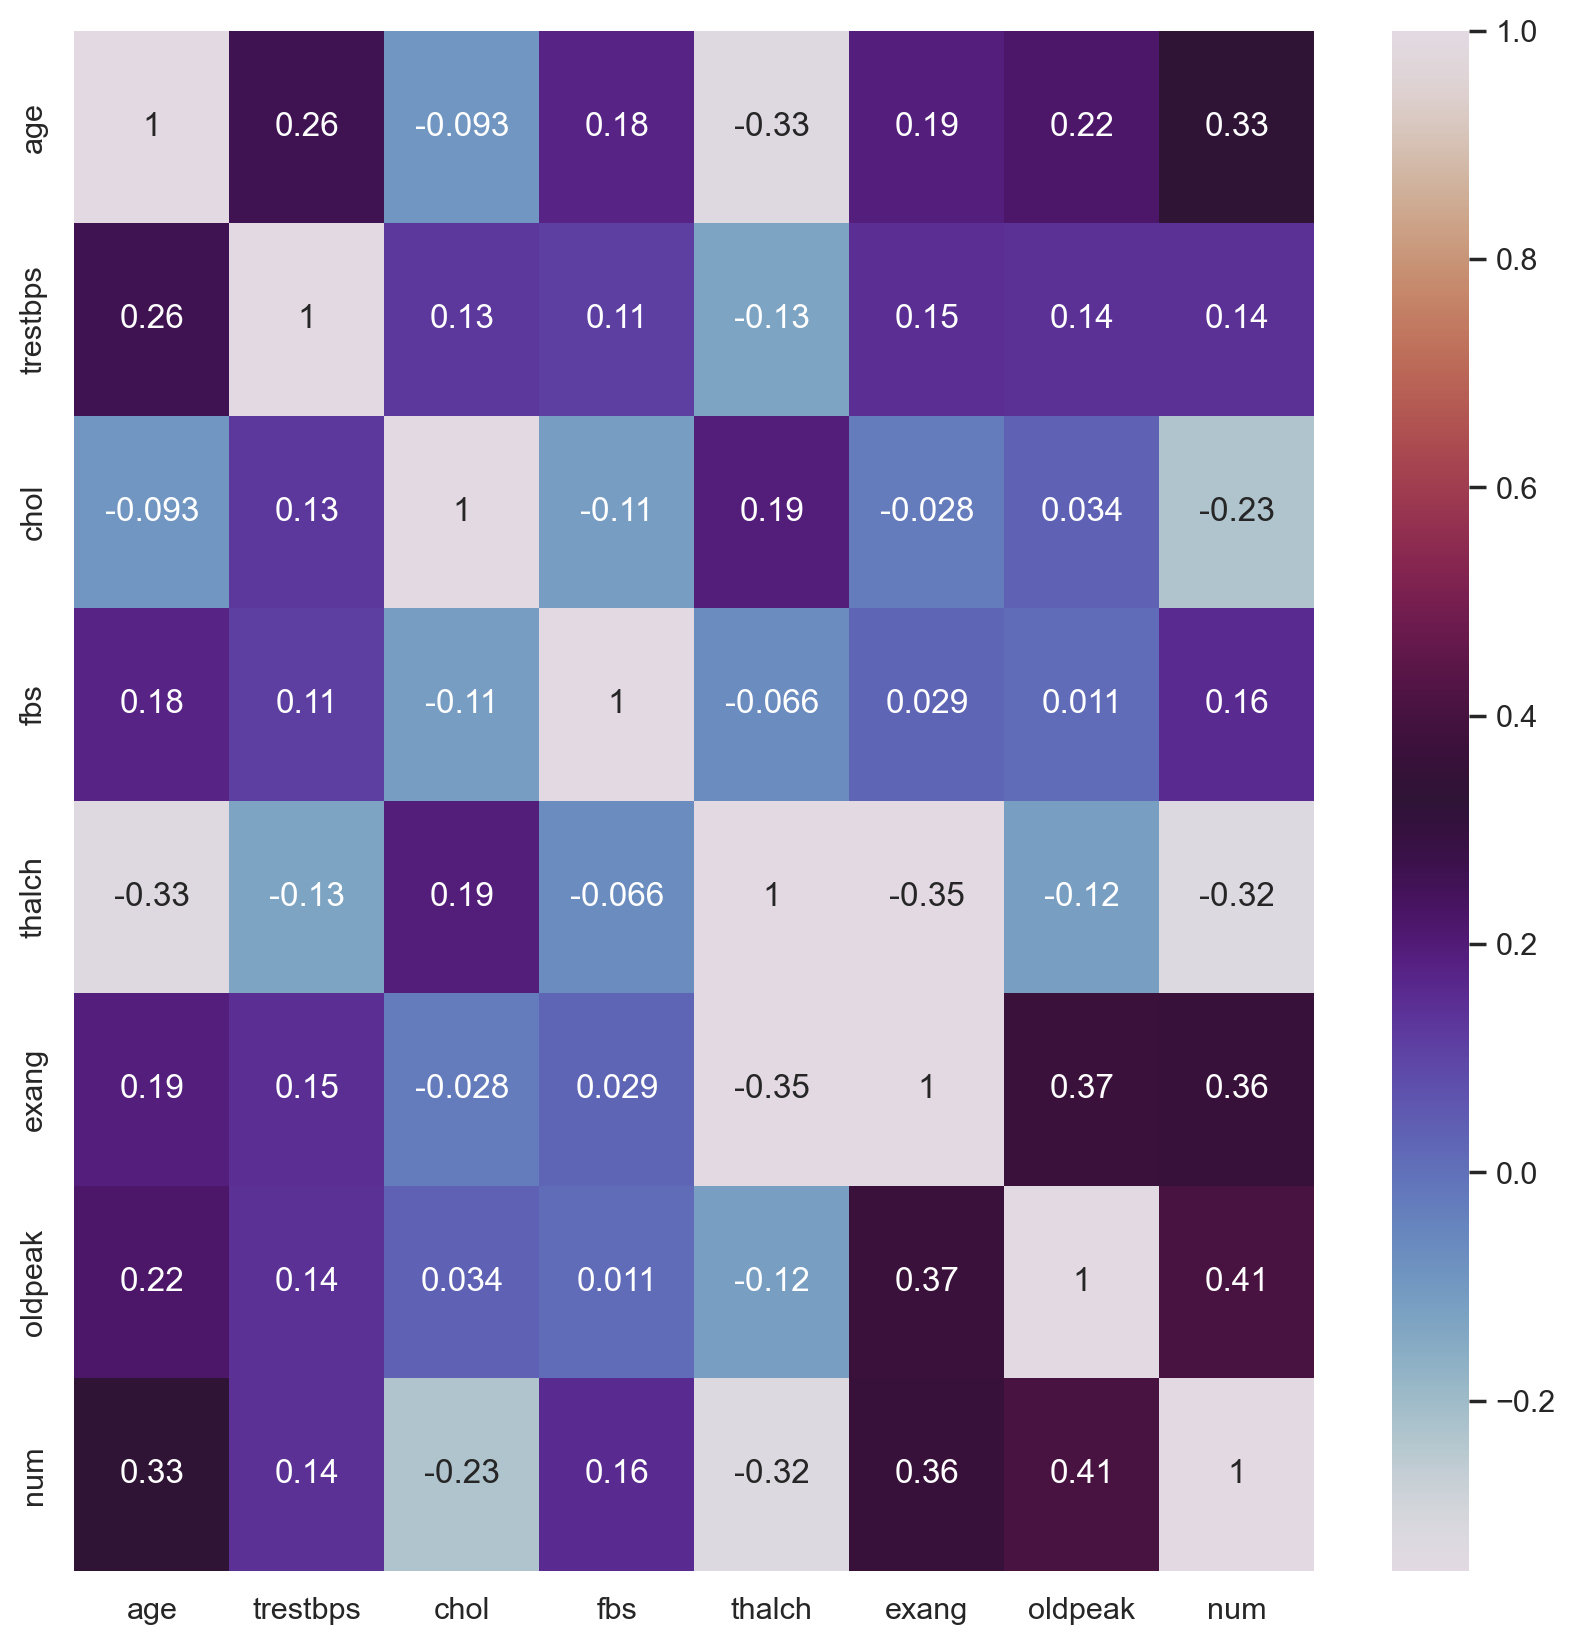

In [75]:
sns.heatmap(df.corr(),annot=True,cmap='twilight')

Encoding

Let's encode all the Text Columns

In [76]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.00,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.00,False,normal,132.0,False,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.00,False,normal,148.0,False,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.00,False,lv hypertrophy,190.0,False,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.00,False,normal,126.0,True,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,Male,asymptomatic,125.0,36.25,False,normal,120.0,False,1.5,upsloping,reversable defect,4.0
904,62.0,Male,asymptomatic,166.0,170.00,False,st-t abnormality,120.0,True,3.0,flat,reversable defect,4.0
905,56.0,Male,non-anginal,170.0,36.25,False,lv hypertrophy,123.0,True,2.5,downsloping,normal,4.0
906,56.0,Male,non-anginal,144.0,208.00,True,st-t abnormality,105.0,True,0.5,downsloping,fixed defect,4.0


In [77]:
from sklearn.preprocessing import OrdinalEncoder

In [78]:
oe = OrdinalEncoder()

In [79]:
df.select_dtypes(object)

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,normal,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,downsloping,normal
906,Male,non-anginal,st-t abnormality,downsloping,fixed defect


In [82]:
cat_cols = df.select_dtypes(object).columns          
cat_cols

Index(['sex', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [83]:
df[cat_cols]

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,normal,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,downsloping,normal
906,Male,non-anginal,st-t abnormality,downsloping,fixed defect


In [84]:
oe = OrdinalEncoder()           

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [85]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1.0,3.0,145.0,233.00,True,0.0,150.0,False,2.3,0.0,0.0,0.0
1,41.0,1.0,1.0,135.0,203.00,False,1.0,132.0,False,0.0,1.0,0.0,0.0
2,57.0,1.0,0.0,140.0,192.00,False,1.0,148.0,False,0.4,1.0,0.0,0.0
3,52.0,1.0,3.0,118.0,186.00,False,0.0,190.0,False,0.0,1.0,0.0,0.0
4,57.0,1.0,0.0,110.0,201.00,False,1.0,126.0,True,1.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1.0,0.0,125.0,36.25,False,1.0,120.0,False,1.5,2.0,2.0,4.0
904,62.0,1.0,0.0,166.0,170.00,False,2.0,120.0,True,3.0,1.0,2.0,4.0
905,56.0,1.0,2.0,170.0,36.25,False,0.0,123.0,True,2.5,0.0,1.0,4.0
906,56.0,1.0,2.0,144.0,208.00,True,2.0,105.0,True,0.5,0.0,0.0,4.0


Encoding is done. Now let's convert Boolean values in integer.

In [90]:
df['fbs'] = df['fbs'].astype(int)

In [91]:
df['exang'] = df['exang'].astype(int)

In [92]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,1.0,3.0,145.0,233.00,1,0.0,150.0,0,2.3,0.0,0.0,0.0
1,41.0,1.0,1.0,135.0,203.00,0,1.0,132.0,0,0.0,1.0,0.0,0.0
2,57.0,1.0,0.0,140.0,192.00,0,1.0,148.0,0,0.4,1.0,0.0,0.0
3,52.0,1.0,3.0,118.0,186.00,0,0.0,190.0,0,0.0,1.0,0.0,0.0
4,57.0,1.0,0.0,110.0,201.00,0,1.0,126.0,1,1.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,1.0,0.0,125.0,36.25,0,1.0,120.0,0,1.5,2.0,2.0,4.0
904,62.0,1.0,0.0,166.0,170.00,0,2.0,120.0,1,3.0,1.0,2.0,4.0
905,56.0,1.0,2.0,170.0,36.25,0,0.0,123.0,1,2.5,0.0,1.0,4.0
906,56.0,1.0,2.0,144.0,208.00,1,2.0,105.0,1,0.5,0.0,0.0,4.0


In [121]:
x = df.iloc[:, :12]
print(x)
y = df['num']
y

      age  sex   cp  trestbps    chol  fbs  restecg  thalch  exang  oldpeak  \
0    63.0  1.0  3.0     145.0  233.00    1      0.0   150.0      0      2.3   
1    41.0  1.0  1.0     135.0  203.00    0      1.0   132.0      0      0.0   
2    57.0  1.0  0.0     140.0  192.00    0      1.0   148.0      0      0.4   
3    52.0  1.0  3.0     118.0  186.00    0      0.0   190.0      0      0.0   
4    57.0  1.0  0.0     110.0  201.00    0      1.0   126.0      1      1.5   
..    ...  ...  ...       ...     ...  ...      ...     ...    ...      ...   
903  53.0  1.0  0.0     125.0   36.25    0      1.0   120.0      0      1.5   
904  62.0  1.0  0.0     166.0  170.00    0      2.0   120.0      1      3.0   
905  56.0  1.0  2.0     170.0   36.25    0      0.0   123.0      1      2.5   
906  56.0  1.0  2.0     144.0  208.00    1      2.0   105.0      1      0.5   
907  57.0  1.0  0.0     142.0  277.00    1      2.0   182.0      0      0.5   

     slope  thal  
0      0.0   0.0  
1      1.0   

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
903    4.0
904    4.0
905    4.0
906    4.0
907    4.0
Name: num, Length: 907, dtype: float64

Scaling the Data

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
sc = StandardScaler()

In [122]:
x = sc.fit_transform(x)
x

array([[ 1.00609656,  0.51477473,  2.32249077, ...,  1.40988965,
        -1.67627931, -1.61530093],
       [-1.39644661,  0.51477473,  0.23374597, ..., -0.8354503 ,
        -0.22691293, -1.61530093],
       [ 0.35085751,  0.51477473, -0.81062643, ..., -0.4449564 ,
        -0.22691293, -1.61530093],
       ...,
       [ 0.241651  ,  0.51477473,  1.27811837, ...,  1.6051366 ,
        -1.67627931, -0.25496858],
       [ 0.241651  ,  0.51477473,  1.27811837, ..., -0.34733292,
        -1.67627931, -1.61530093],
       [ 0.35085751,  0.51477473, -0.81062643, ..., -0.34733292,
        -0.22691293,  1.10536377]])

In [123]:
x = pd.DataFrame(x, columns = df.drop(columns = 'num').columns)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,0.514775,2.322491,0.608289,0.265386,1.975526,-1.560916,0.523305,-0.833863,1.409890,-1.676279,-1.615301
1,-1.396447,0.514775,0.233746,0.089952,-0.043590,-0.506194,0.015644,-0.148458,-0.833863,-0.835450,-0.226913,-1.615301
2,0.350858,0.514775,-0.810626,0.349120,-0.156881,-0.506194,0.015644,0.448665,-0.833863,-0.444956,-0.226913,-1.615301
3,-0.195175,0.514775,2.322491,-0.791221,-0.218677,-0.506194,-1.560916,2.016110,-0.833863,-0.835450,-0.226913,-1.615301
4,0.350858,0.514775,-0.810626,-1.205891,-0.064188,-0.506194,0.015644,-0.372378,1.199238,0.628902,-0.226913,-1.615301
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.085969,0.514775,-0.810626,-0.428385,-1.760984,-0.506194,0.015644,-0.596299,-0.833863,0.628902,1.222453,1.105364
903,0.896890,0.514775,-0.810626,1.696797,-0.383464,-0.506194,1.592203,-0.596299,1.199238,2.093254,-0.226913,1.105364
904,0.241651,0.514775,1.278118,1.904132,-1.760984,-0.506194,-1.560916,-0.484339,1.199238,1.605137,-1.676279,-0.254969
905,0.241651,0.514775,1.278118,0.556455,0.007906,1.975526,1.592203,-1.156101,1.199238,-0.347333,-1.676279,-1.615301


Now our data is ready to be used for Model Building

We are going to use C5.0 Method for Decision Tree Model Building

In [97]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [125]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
84,-1.287240,0.514775,0.233746,-0.687554,0.903938,-0.506194,0.015644,0.971147,-0.833863,-0.835450,1.222453,-0.254969
10,-2.597718,-1.942597,2.322491,1.904132,0.306583,-0.506194,1.592203,1.269708,-0.833863,-0.835450,-1.676279,-1.615301
616,0.460064,0.514775,1.278118,1.385795,0.038804,1.975526,1.592203,-1.641263,-0.833863,-0.835450,1.222453,-1.615301
250,-1.396447,0.514775,-0.810626,-1.516894,-1.760984,-0.506194,1.592203,-0.932181,-0.833863,-0.835450,-0.226913,-0.254969
478,1.115303,-1.942597,-0.810626,0.452788,0.708253,-0.506194,0.015644,0.150103,1.199238,0.140784,-0.226913,1.105364
...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.006097,-1.942597,1.278118,0.089952,0.461071,-0.506194,-1.560916,1.344348,-0.833863,-0.835450,1.222453,-0.254969
270,-1.833273,-1.942597,0.233746,-0.687554,0.543465,-0.506194,0.015644,-0.223098,-0.833863,-0.835450,-1.676279,-1.615301
860,0.132444,0.514775,-0.810626,2.007800,0.543465,-0.506194,0.015644,-2.350346,-0.833863,1.117019,-1.676279,-0.254969
435,0.350858,0.514775,0.233746,1.074793,0.255087,-0.506194,-1.560916,1.045787,-0.833863,-0.835450,1.222453,-0.254969


In [126]:
ytrain

84     0.0
10     0.0
616    1.0
250    0.0
478    1.0
      ... 
106    0.0
270    0.0
861    3.0
435    1.0
102    0.0
Name: num, Length: 725, dtype: float64

In [127]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
868,-0.522795,0.514775,1.278118,0.193619,-0.671842,-0.506194,0.015644,-2.536947,-0.833863,-0.347333,-0.226913,-0.254969
439,0.460064,0.514775,-0.810626,1.904132,-1.760984,1.975526,1.592203,-1.156101,1.199238,-0.835450,-1.676279,-0.254969
342,-1.396447,0.514775,0.233746,-0.687554,0.862741,-0.506194,1.592203,0.896506,-0.833863,-0.835450,-1.676279,-0.254969
735,0.678477,0.514775,-0.810626,-0.065549,0.110898,-0.506194,1.592203,0.150103,1.199238,0.628902,-1.676279,-0.254969
784,0.023238,0.514775,-0.810626,-1.205891,-0.012692,-0.506194,-1.560916,-1.044141,1.199238,-0.835450,-0.226913,-0.254969
...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1.724066,0.514775,-0.810626,-1.205891,0.594961,-0.506194,0.015644,0.523305,1.199238,0.140784,-0.226913,-0.254969
867,1.224510,0.514775,-0.810626,-0.376552,1.079024,-0.506194,-1.560916,0.747226,-0.833863,-0.347333,-1.676279,-0.254969
445,-0.085969,0.514775,-0.810626,0.349120,-0.043590,1.975526,-1.560916,0.709906,1.199238,2.190877,-1.676279,1.105364
785,0.023238,0.514775,-0.810626,-0.583887,0.811245,-0.506194,-1.560916,-0.745580,1.199238,2.288501,-0.226913,-0.254969


In [128]:
ytest

869    3.0
439    1.0
342    0.0
735    2.0
785    3.0
      ... 
598    1.0
868    3.0
445    1.0
786    3.0
25     0.0
Name: num, Length: 182, dtype: float64

In [129]:
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)    
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ypred

array([3., 1., 0., 2., 1., 2., 0., 0., 1., 0., 0., 2., 0., 0., 1., 1., 0.,
       0., 2., 1., 0., 1., 1., 1., 4., 1., 0., 2., 3., 0., 0., 1., 0., 0.,
       0., 2., 2., 3., 0., 3., 1., 0., 2., 0., 1., 1., 0., 0., 0., 2., 1.,
       3., 2., 1., 0., 0., 3., 0., 3., 3., 3., 0., 2., 1., 0., 1., 3., 2.,
       2., 1., 0., 1., 3., 3., 0., 2., 3., 0., 2., 0., 1., 0., 0., 0., 0.,
       0., 0., 2., 1., 0., 0., 1., 0., 0., 0., 3., 2., 0., 1., 0., 0., 2.,
       0., 1., 0., 2., 1., 1., 1., 1., 3., 0., 1., 0., 0., 0., 1., 1., 2.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 4., 1., 0., 0., 0., 1., 3., 0.,
       3., 1., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 1., 0., 1.,
       1., 0., 1., 2., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 4., 2., 1.,
       1., 1., 0., 0., 0., 0., 2., 1., 0., 3., 1., 0.])

In [130]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [131]:
dt.feature_importances_  

array([0.14455247, 0.0219954 , 0.10486492, 0.1251629 , 0.15220836,
       0.01767083, 0.05698892, 0.12624162, 0.04116905, 0.10166226,
       0.05774264, 0.04974064])

In [132]:
#model evaluation

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73        89
         1.0       0.42      0.47      0.44        47
         2.0       0.32      0.40      0.36        20
         3.0       0.22      0.24      0.23        17
         4.0       0.00      0.00      0.00         9

    accuracy                           0.53       182
   macro avg       0.34      0.36      0.35       182
weighted avg       0.53      0.53      0.53       182



In [135]:
confusion_matrix(ytest, ypred)

array([[63, 17,  4,  4,  1],
       [14, 22,  3,  7,  1],
       [ 3,  6,  8,  2,  1],
       [ 3,  6,  4,  4,  0],
       [ 0,  2,  6,  1,  0]], dtype=int64)

In [136]:
print('Training Accuracy :', dt.score(xtrain, ytrain))    
print('Testing Accuracy :', np.round(dt.score(xtest, ytest), 2))

Training Accuracy : 1.0
Testing Accuracy : 0.53


Let's visualize the Decision Tree.

In [147]:
df = df.astype(str)

In [148]:
df.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalch      object
exang       object
oldpeak     object
slope       object
thal        object
num         object
dtype: object

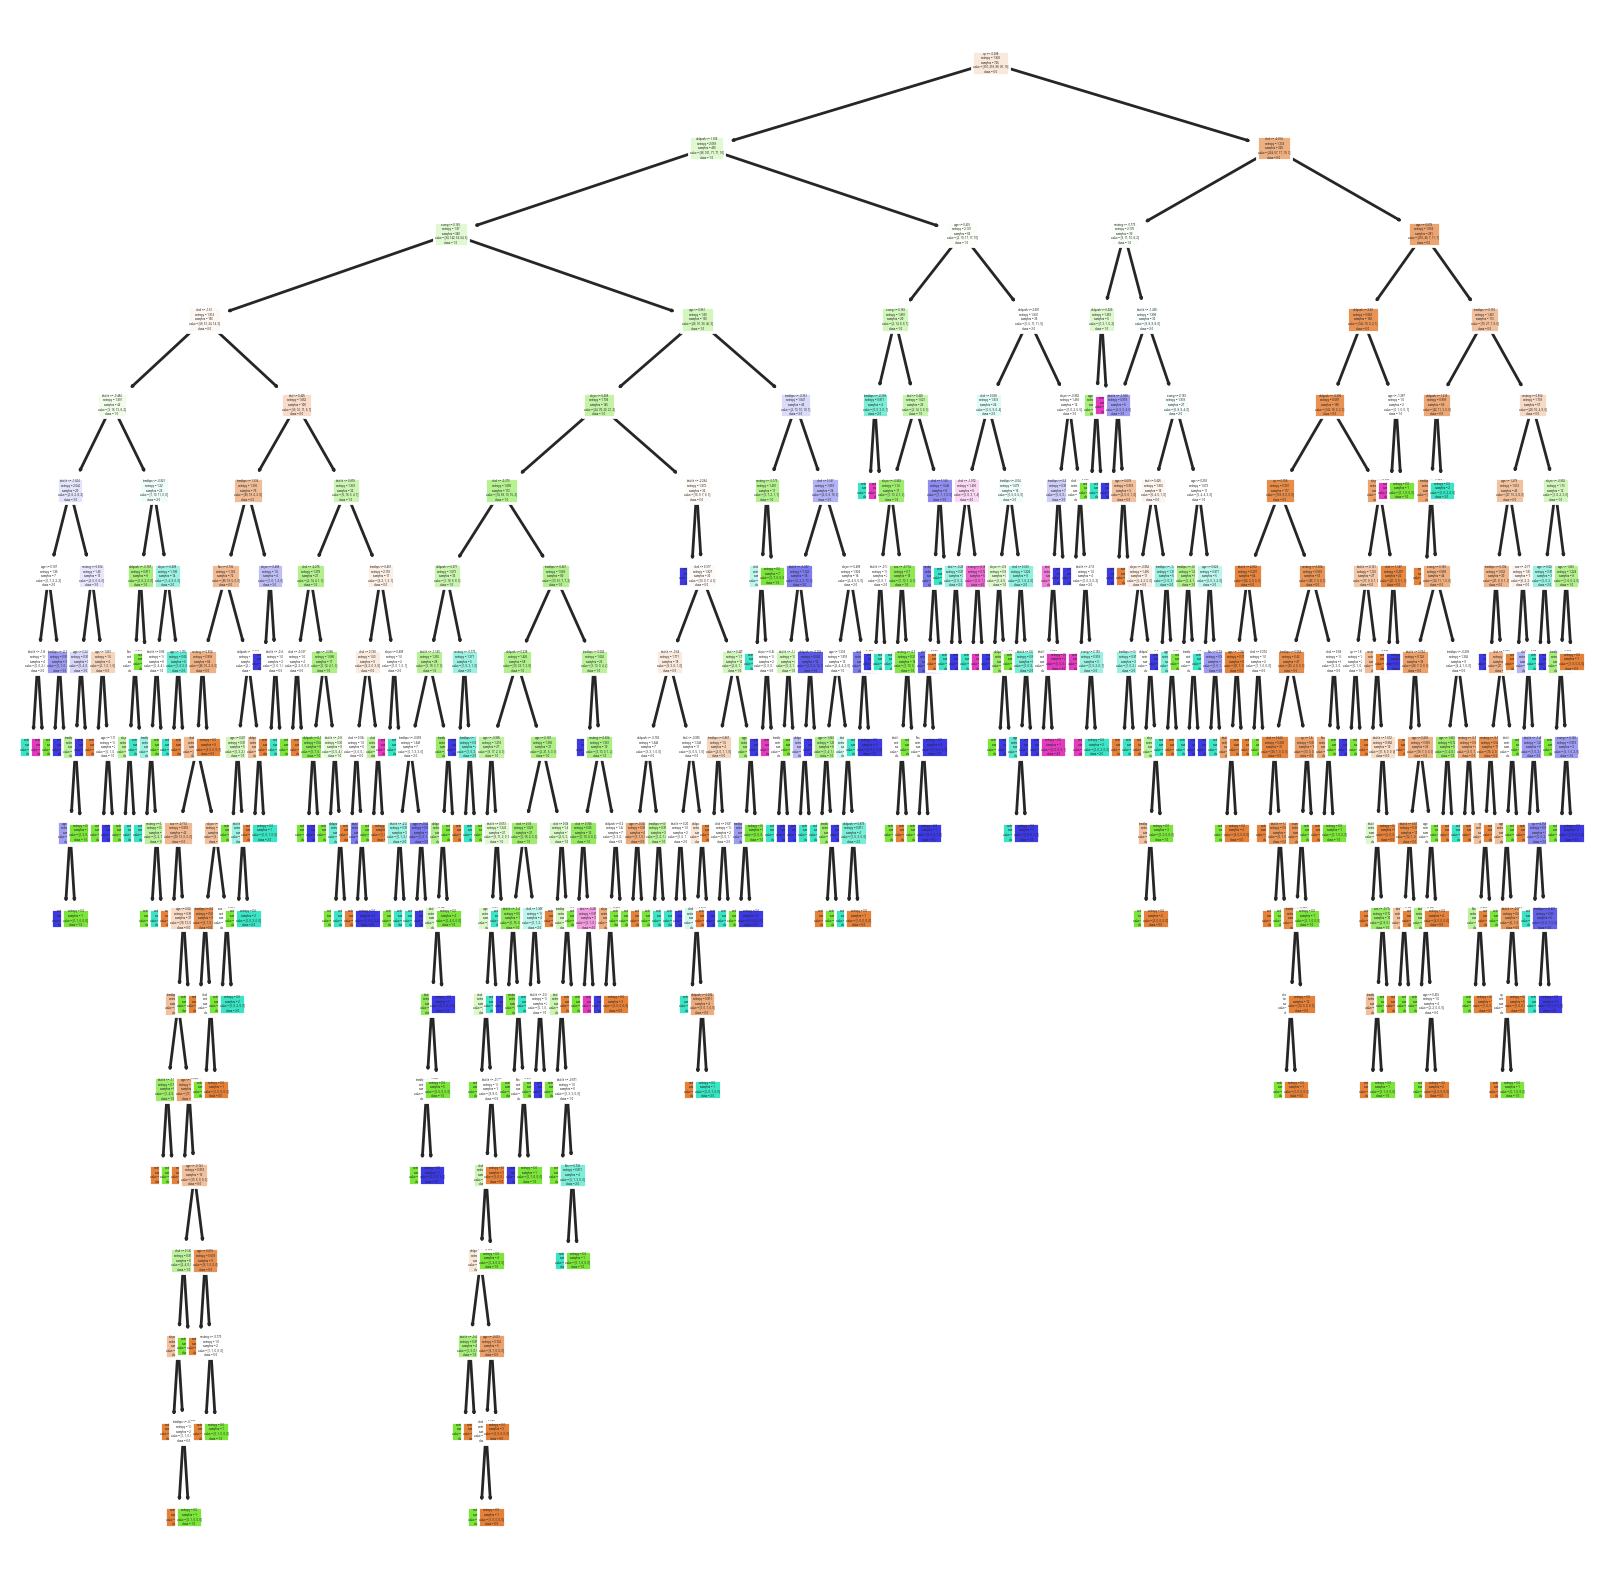

In [149]:
tree.plot_tree(dt, feature_names = x.columns, class_names = df['num'].unique(), filled = True)
plt.show()

Through the results , the decision tree is not much visible and the accuracy we got is also not good. So, we will do hyper parameter tuning to improve the results.

HyperParameter Tuning

In [150]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [151]:
from sklearn.model_selection import GridSearchCV 

In [152]:
params = {'criterion' : [ 'entropy', 'gini'],
          'max_depth' : [ 1,2,3,4,5,6,7,8,9],           
          'splitter' :  [ 'best', 'random' ] 
         }

In [153]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params, verbose = 1)

In [154]:
grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [155]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [156]:
dtr = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, splitter = 'random')

In [157]:
dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
yp

array([0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 2., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 2., 0., 0., 2., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 2.,
       1., 1., 0., 2., 0., 1., 0., 2., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 2., 0., 1., 2., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 3., 1., 1., 1., 1., 1., 0., 1., 2., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 2., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 2., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 2., 1., 1.,
       3., 2., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.])

In [160]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [161]:
dtr.feature_importances_  

array([0.04129429, 0.04740839, 0.21249349, 0.05741079, 0.06951108,
       0.08175406, 0.0189425 , 0.03110581, 0.26249477, 0.08155368,
       0.        , 0.09603113])

In [158]:
dtr.score(xtrain, ytrain), dtr.score(xtest, ytest) 

(0.6124137931034482, 0.5824175824175825)

In [162]:
print(classification_report(ytest, yp))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        89
         1.0       0.40      0.66      0.50        47
         2.0       0.38      0.25      0.30        20
         3.0       1.00      0.12      0.21        17
         4.0       0.00      0.00      0.00         9

    accuracy                           0.58       182
   macro avg       0.51      0.36      0.35       182
weighted avg       0.61      0.58      0.55       182



In [163]:
confusion_matrix(ytest, ypred)

array([[63, 17,  4,  4,  1],
       [14, 22,  3,  7,  1],
       [ 3,  6,  8,  2,  1],
       [ 3,  6,  4,  4,  0],
       [ 0,  2,  6,  1,  0]], dtype=int64)

We can see after Hyper Parameter Tuning , We are getting Generalized Model and the max Accuracy we can get for Testing Data is 58%.

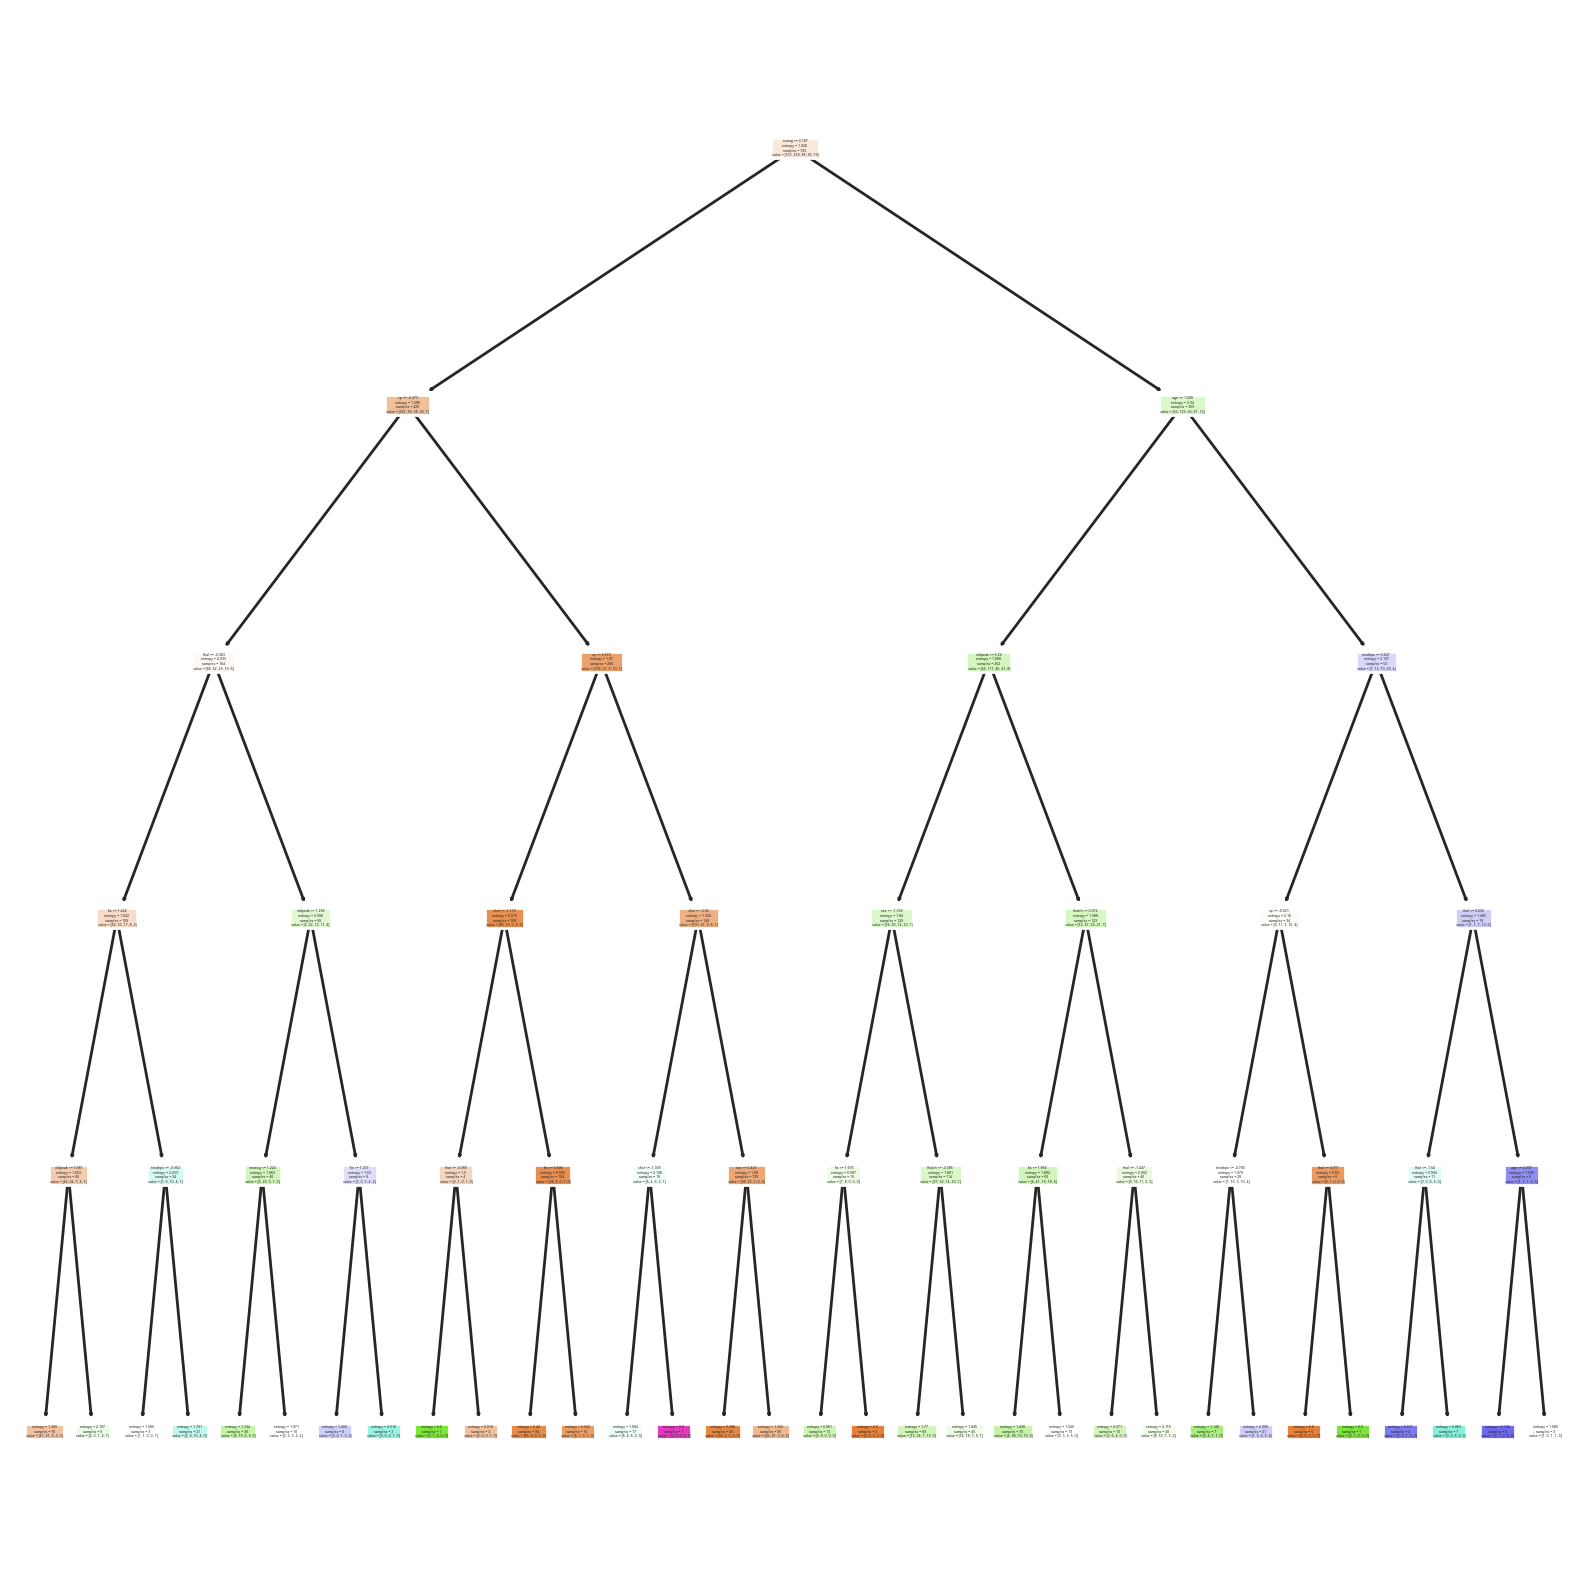

In [159]:
#let's Visualize the Decision Tree
tree.plot_tree(dtr, feature_names = x.columns, filled = True)
plt.show()

Interview Questions

1.  What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

These are some common hyperparameters of Decision Tree Model :
1. Criterion : For Classification tree it can be "Entropy" or "Gini". The algorothm chooses the evaluation method accordingly this parameter. For Regression tree it can be "squared-error" or "absolute-error", the algorithm performs calculations accordingly in this case.
2. Max_Depth : It shows how many layers we want to see in the Decision Tree. Depth of decision tree also affects model's accuracy, bcz as depth and splits are more, our model will memorize everything and it will end up being overfitted, thats why controlling DT depth is important.
3. Splitter : The values for it can be "best" or "Random" and accordingly the algorithm will choose the best or random splitting conditions.

2. What is the difference between the Label encoding and One-hot encoding?

-  One Hot Encoding : It can be used only for Independent columns. The biggest con of using this method is that it creates as many new columns as the no. of unique values in the given column, which results in increasing no. of columns in our dataset, which can affect the accuracy of the model. So, it is good when the no. of unique values in column is less than 5.
-  Label Encoding : It can be used only for Target Column. The best thing is it is very easy to apply and encode values in a single column only. It generally just sorts values and give them numbers accordingly. The con is it can't be used for independent columns.